In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.random.normal(size=10000)

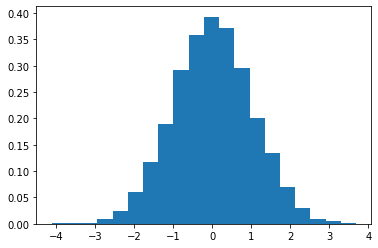

In [6]:
_= plt.hist(x, density=True, bins=20)

In [9]:
x_lineal = np.linspace(-4,4,100)
sigma = 1
y = (1.0/np.sqrt(2.0*np.pi*sigma**2))*np.exp(-0.5 * (x_lineal/sigma)**2)

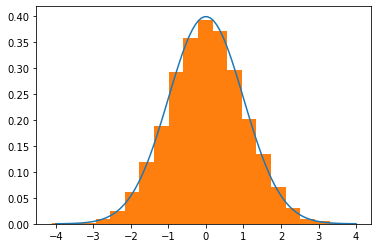

In [11]:
plt.plot(x_lineal, y)
_= plt.hist(x, density=True, bins=20)

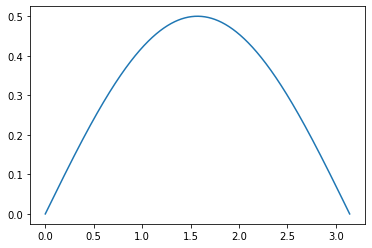

In [12]:
theta = np.linspace(0.0, np.pi, 1000)
p_theta = 0.5 * np.sin(theta)
plt.plot(theta, p_theta)

In [15]:
theta = np.random.random(10000)*np.pi
theta = 0.5 * np.sin(theta) # metodo incorrecto!

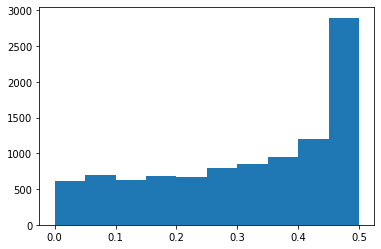

In [16]:
_ = plt.hist(theta)

In [6]:
def proba(x):
    y = 0
    if (x>0) and (x<np.pi):
        y = 0.5 * np.sin(x)
    return y

def metropolis_hastings(x, delta=0.1):
    x_nuevo = x + (np.random.random()-0.5)*2.0*delta
    gamma = min(1, proba(x_nuevo)/proba(x))
    alpha = np.random.random()
    if alpha<gamma:
        x = x_nuevo
    return x

In [28]:
n_iteraciones = 100000
theta = np.ones(n_iteraciones)

for i in range(1,n_iteraciones):
    theta[i] = metropolis_hastings(theta[i-1], delta=0.4)


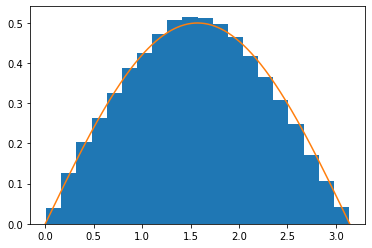

In [31]:
theta_teorico = np.linspace(0.0, np.pi, 1000)
p_theta_teorico = 0.5 * np.sin(theta_teorico)

_ = plt.hist(theta, bins=20, density=True)
plt.plot(theta_teorico, p_theta_teorico)

In [74]:
def proba(x):
    sigma = 1
    y = np.exp(-0.5 * (x/sigma)**2)
    return y

def metropolis_hastings(x, delta=0.1):
    x_nuevo = x + (np.random.random()-0.5)*2.0*delta
    gamma = min(1, proba(x_nuevo)/proba(x))
    alpha = np.random.random()
    if alpha<gamma:
        x = x_nuevo
    return x

n_iteraciones = 50000
x_markov = np.ones(n_iteraciones)
x_markov[0] = 0
for i in range(1,n_iteraciones):
    x_markov[i] = metropolis_hastings(x_markov[i-1], delta=1)


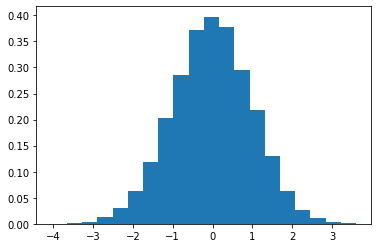

In [75]:
_ = plt.hist(x_markov, bins=20, density=True)

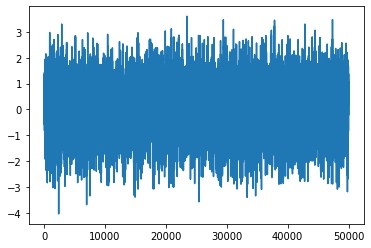

In [76]:
plt.plot(x_markov)

In [87]:
def dens(x,y):
    return np.exp(-0.5 *(0.25*x**2+ y**2 + x*y/1.5))

In [88]:
x_line = np.linspace(-5,5,100)
y_line = np.linspace(-5,5,100)
x_grid,y_grid = np.meshgrid(x_line,y_line)
z_grid = dens(x_grid, y_grid)

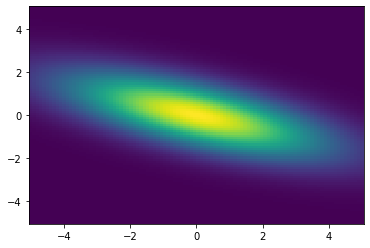

In [89]:
plt.pcolormesh(x_grid, y_grid, z_grid)

In [90]:
def metropolis_hastings_2D(N=10000, delta=0.5):
    lista_x = [0]
    lista_y = [0]
    
    for i in range(1,N):
        propuesta_x = lista_x[i-1] + np.random.normal(loc=0.0, scale=delta)
        propuesta_y = lista_y[i-1] + np.random.normal(loc=0.0, scale=delta)
        
        gamma = min(1, dens(propuesta_x,propuesta_y)/dens(lista_x[i-1], lista_y[i-1]))
        alpha = np.random.random()
        if (alpha<gamma):
            lista_x.append(propuesta_x)
            lista_y.append(propuesta_y)
        else:
            lista_x.append(lista_x[i-1])
            lista_y.append(lista_y[i-1])
    return np.array(lista_x), np.array(lista_y)
        

In [109]:
x_array, y_array = metropolis_hastings_2D(N=200000,delta=1.0)

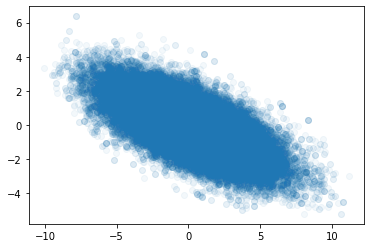

In [102]:
plt.scatter(x_array,y_array, alpha=0.05)

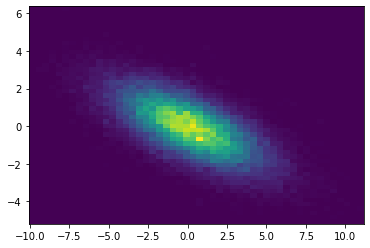

In [103]:
_ = plt.hist2d(x_array,y_array, bins=50)

(-3.0, 3.0)

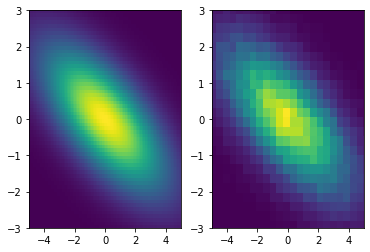

In [110]:
plt.subplot(1,2,1)
plt.pcolormesh(x_grid, y_grid, z_grid)
plt.xlim([-5,5])
plt.ylim([-3,3])

plt.subplot(1,2,2)
_ = plt.hist2d(x_array,y_array, bins=50)
plt.xlim([-5,5])
plt.ylim([-3,3])